<a href="https://colab.research.google.com/github/Alfafauzan/DML-SMT6/blob/main/DML_Peminjaman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Pembacaan Dataset
import pandas as pd

#Baca isian Dataset
piutang = pd.read_csv('creditapproval_bersih (2).csv')
piutang.head()

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40.0,345000,1.0,345000,100,301,6000.0,1,874,875,345000,345000,0,NaN
1,x2,L,31.0,350000,7.0,55716,100,301,6000.0,1,874,875,390000,111428,0,NaN
2,x3,L,NaN,649926,6.0,108321,100,301,6000.0,1,874,875,649926,216642,0,NaN
3,x4,P,2.0,459168,NaN,38264,100,301,6000.0,1,874,875,459168,382640,0,NaN
4,x5,WANITA,34.0,3055499,8.0,"381937,41",100,301,6000.0,1,874,875,3055499,"1527749,48",0,NaN


In [5]:
#Struktur Dataset
print("Jumlah Baris", piutang.shape[0])
print("Jumlah Kolom", piutang.shape[1])
print('\n5 Data Teratas')
display(piutang.head())


Jumlah Baris 766
Jumlah Kolom 16

5 Data Teratas


,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40.0,345000,1.0,345000,100,301,6000.0,1,874,875,345000,345000,0,NaN
1,x2,L,31.0,350000,7.0,55716,100,301,6000.0,1,874,875,390000,111428,0,NaN
2,x3,L,NaN,649926,6.0,108321,100,301,6000.0,1,874,875,649926,216642,0,NaN
3,x4,P,2.0,459168,NaN,38264,100,301,6000.0,1,874,875,459168,382640,0,NaN
4,x5,WANITA,34.0,3055499,8.0,"381937,41",100,301,6000.0,1,874,875,3055499,"1527749,48",0,NaN


In [6]:
# Kolom dan tipe data

print('Tipe Data per Kolom: \n')
print(piutang.dtypes)

print('\n Statistik dan deskripsi kolom numerik: \n')
display(piutang.describe())

print('\n Statistik dan deskripsi kolom kategorikal: \n')
display(piutang.describe(include=['object']))



Tipe Data per Kolom: 

nama_nasabah               object
jenis_kelamin              object
umur                      float64
jml_pinjaman               object
jkw                       float64
jml_angsuran_per_bulan     object
type_pinjaman               int64
jenis_pinjaman              int64
bi_sektor_ekonomi         float64
col                         int64
bi_golongan_debitur         int64
bi_gol_penjamin             int64
saldo_nominatif            object
tunggakan_pokok            object
tunggakan_bunga            object
status kredit             float64
dtype: object

 Statistik dan deskripsi kolom numerik: 



,umur,jkw,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,status kredit
count,757.000000,758.000000,766.0,766.000000,765.000000,766.000000,766.000000,766.000000,0.0
mean,29.073976,19.011873,100.0,301.197128,6013.045752,1.216710,873.968668,281.300261,NaN
std,264.552192,32.231431,0.0,0.822267,216.196305,0.412273,1.460257,408.099019,NaN
min,-7162.000000,1.000000,100.0,301.000000,6000.000000,1.000000,834.000000,0.000000,NaN
25%,32.000000,8.000000,100.0,301.000000,6000.000000,1.000000,874.000000,0.000000,NaN
50%,38.000000,12.000000,100.0,301.000000,6000.000000,1.000000,874.000000,0.000000,NaN
75%,43.000000,20.000000,100.0,301.000000,6000.000000,1.000000,874.000000,875.000000,NaN
max,1043.000000,679.000000,100.0,305.000000,9990.000000,2.000000,876.000000,875.000000,NaN



 Statistik dan deskripsi kolom kategorikal: 



,nama_nasabah,jenis_kelamin,jml_pinjaman,jml_angsuran_per_bulan,saldo_nominatif,tunggakan_pokok,tunggakan_bunga
count,766,766,766,766,766,766,766
unique,766,6,328,449,528,490,142
top,x766,P,1500000,"90833,37",1000000,0,0
freq,1,454,112,48,20,143,403


In [7]:
#Cek Missing Values
print('Jumlah nilai yang hilang per kolom: \n')
print(piutang.isnull().sum())

# Cek kolom yang mengandung koma

object_cols = piutang.select_dtypes(include=['object']).columns
print('\nKolom yang mengandung koma: \n')
for col in object_cols:
    if piutang[col].astype(str).str.contains(',', na=False).any():
        print(f"-{col}")

# Cek nilai wajar pada "umur"

if 'umur' in piutang.columns:
    print('\nStatistik pada kolom "umur": \n')
    print(piutang['umur'].describe())
    print("\n Minimal Umur", piutang['umur'].min(), "Maksimum Umur", piutang['umur'].max())


Jumlah nilai yang hilang per kolom: 

nama_nasabah                0
jenis_kelamin               0
umur                        9
jml_pinjaman                0
jkw                         8
jml_angsuran_per_bulan      0
type_pinjaman               0
jenis_pinjaman              0
bi_sektor_ekonomi           1
col                         0
bi_golongan_debitur         0
bi_gol_penjamin             0
saldo_nominatif             0
tunggakan_pokok             0
tunggakan_bunga             0
status kredit             766
dtype: int64

Kolom yang mengandung koma: 

-jml_pinjaman
-jml_angsuran_per_bulan
-saldo_nominatif
-tunggakan_pokok
-tunggakan_bunga

Statistik pada kolom "umur": 

count     757.000000
mean       29.073976
std       264.552192
min     -7162.000000
25%        32.000000
50%        38.000000
75%        43.000000
max      1043.000000
Name: umur, dtype: float64

 Minimal Umur -7162.0 Maksimum Umur 1043.0


In [8]:
# Ubah angka koma jadi float

def to_float(x):
   if isinstance(x, str):
       return float(x.replace(',', '.').replace(',', '.'))
   return x

uang_cols=['jml_pinjaman','jml_angsuran_per_bulan','saldo_nominatif','tunggakan_pokok','tunggakan_bunga']

for col in uang_cols:
    if col in piutang.columns:
        piutang[col] = piutang[col].apply(to_float)

#Bersihkan Nilai umur yang ngaco
if'umur' in piutang.columns:
    piutang = piutang[(piutang['umur'] >= 10) & (piutang['umur'] <= 100)]
    piutang['umur'].fillna(piutang['umur'].median(), inplace=True)

#Isi nilai kosong
piutang.fillna(piutang.median(numeric_only=True), inplace=True)

<ipython-input-8-254c1312de41>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  piutang['umur'].fillna(piutang['umur'].median(), inplace=True)
<ipython-input-8-254c1312de41>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  piutang['umur'].fillna(piutang['umur'].median(), inplace=True)
<ipython-input-8-254c1312de41>:20: SettingWithCopyWarning

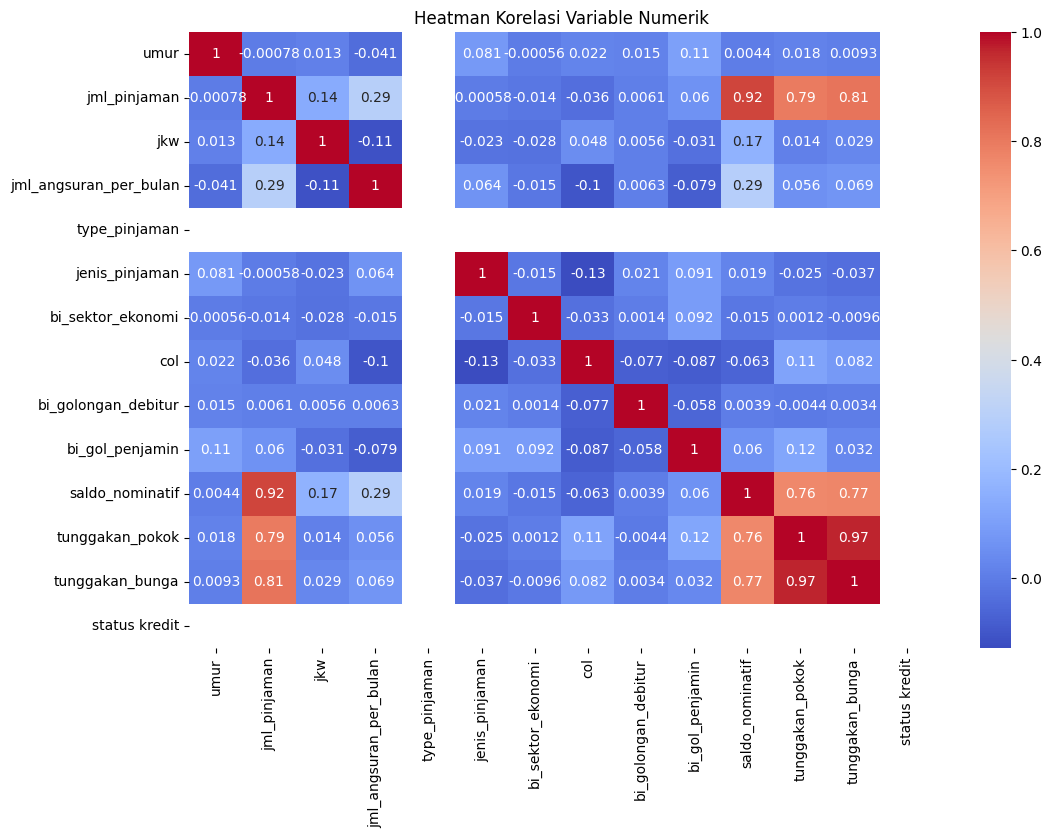

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#Korelasi antara variable numerik
plt.figure(figsize=(12, 8))
sns.heatmap(piutang.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Heatman Korelasi Variable Numerik')
plt.show()

In [11]:
# Logika sederhana status kredit
threshold_pinjaman = 100_000_000  # Ubah sesuai konteks

def hitung_status_kredit(row):
    # Mengganti 'jumlah_pinjaman' dengan 'jml_pinjaman'
    if row['tunggakan_pokok'] > 0 or row['jml_pinjaman'] > threshold_pinjaman:
        return 'Ditolak'
    else:
        return 'Disetujui'

# Buat kolom baru
piutang['status_kredit'] = piutang.apply(hitung_status_kredit, axis=1)

# Tampilkan hasil
# Mengganti 'jumlah_pinjaman' dengan 'jml_pinjaman'
piutang[['tunggakan_pokok', 'jml_pinjaman', 'status_kredit']].head()

,tunggakan_pokok,jml_pinjaman,status_kredit
0,345000.00,345000.0,Ditolak
1,111428.00,350000.0,Ditolak
4,1527749.48,3055499.0,Ditolak
5,0.00,2000000.0,Disetujui
7,0.00,4435001.0,Disetujui


from matplotlib import pyplot as plt
_df_0['tunggakan_pokok'].plot(kind='hist', bins=20, title='tunggakan_pokok')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['jml_pinjaman'].plot(kind='hist', bins=20, title='jml_pinjaman')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('status_kredit').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='tunggakan_pokok', y='jml_pinjaman', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['tunggakan_pokok'].plot(kind='line', figsize=(8, 4), title='tunggakan_pokok')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['jml_pinjaman'].plot(kind='line', figsize=(8, 4), title='jml_pinjaman')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['status_kredit'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='tunggakan_pokok', y='status_kredit', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['status_kredit'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='jml_pinjaman', y='status_kredit', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-12-bf42fc803cec>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status Kredit', y='Jumlah Nasabah', data=status_counts, palette='viridis')


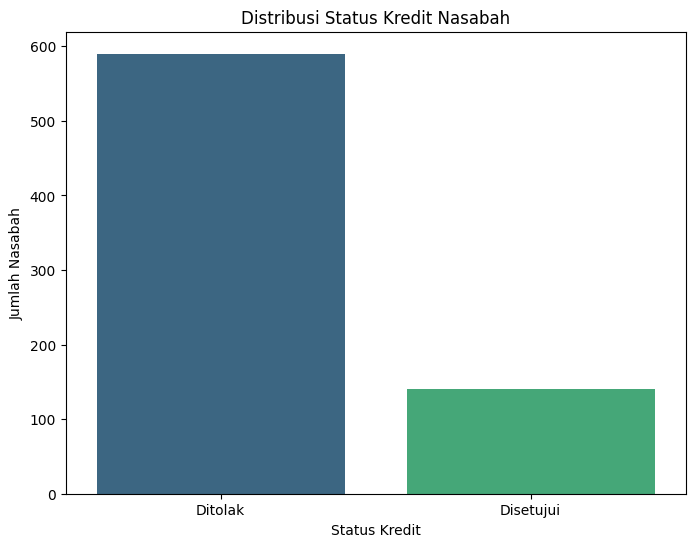

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Pastikan pandas sudah diimpor

# Hitung jumlah nasabah per status kredit
status_counts = piutang['status_kredit'].value_counts().reset_index()
status_counts.columns = ['Status Kredit', 'Jumlah Nasabah']

# Buat diagram batang
plt.figure(figsize=(8, 6))
sns.barplot(x='Status Kredit', y='Jumlah Nasabah', data=status_counts, palette='viridis')
plt.title('Distribusi Status Kredit Nasabah')
plt.xlabel('Status Kredit')
plt.ylabel('Jumlah Nasabah')
plt.show()

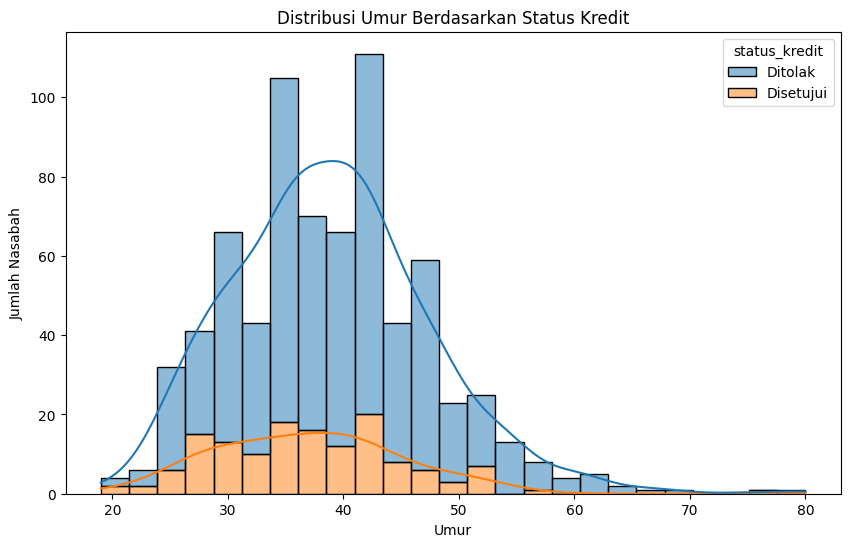

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan kolom 'umur' ada dan bertipe numerik
if 'umur' in piutang.columns:
    # Buat histogram umur, dipisahkan berdasarkan status kredit
    plt.figure(figsize=(10, 6))
    sns.histplot(data=piutang, x='umur', hue='status_kredit', multiple='stack', kde=True)
    plt.title('Distribusi Umur Berdasarkan Status Kredit')
    plt.xlabel('Umur')
    plt.ylabel('Jumlah Nasabah')
    plt.show()
else:
    print("Kolom 'umur' tidak ditemukan di DataFrame.")

Ukuran data pelatihan: (584, 748)
Ukuran data pengujian: (146, 748)

Melatih model Random Forest...
Model selesai dilatih.

Evaluasi Model Random Forest:
Akurasi: 1.0000

Classification Report:
              precision    recall  f1-score   support

   Disetujui       1.00      1.00      1.00        28
     Ditolak       1.00      1.00      1.00       118

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146


Confusion Matrix:
[[ 28   0]
 [  0 118]]


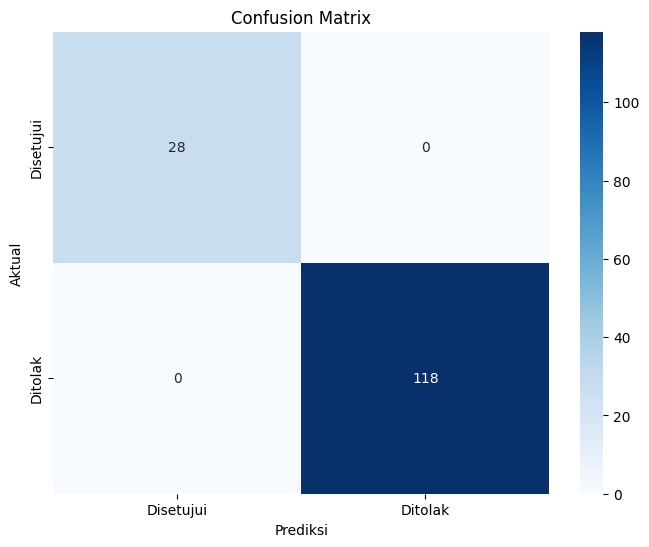

In [15]:
# Terapkan dengan model random forest dan visualisasikan

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay # Impor ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt # Impor matplotlib
import seaborn as sns # Impor seaborn

# 1. Mempersiapkan Data (Sama seperti sebelumnya)

# Pisahkan fitur (X) dan target (y)
X = piutang.drop('status_kredit', axis=1)
y = piutang['status_kredit']

# Identifikasi kolom kategorikal
categorical_cols = X.select_dtypes(include=['object']).columns

# Terapkan One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Ukuran data pelatihan:", X_train.shape)
print("Ukuran data pengujian:", X_test.shape)


# 2. Memilih dan Melatih Model (Sama seperti sebelumnya)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

print("\nMelatih model Random Forest...")
model_rf.fit(X_train, y_train)
print("Model selesai dilatih.")

# 3. Evaluasi Model (Sama seperti sebelumnya, plus visualisasi)

y_pred = model_rf.predict(X_test)

print("\nEvaluasi Model Random Forest:")

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 4. Visualisasi Hasil

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Alternatif menggunakan ConfusionMatrixDisplay (lebih baru di sklearn)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
# disp.plot(cmap='Blues')
# plt.title('Confusion Matrix')
# plt.show()


# Visualisasi lain (opsional): Distribusi Probabilitas Prediksi untuk satu kelas
# if 'Ditolak' in model_rf.classes_: # Contoh untuk kelas 'Ditolak'
#     y_pred_proba = model_rf.predict_proba(X_test)[:, list(model_rf.classes_).index('Ditolak')]
#
#     plt.figure(figsize=(10, 6))
#     sns.histplot(y_pred_proba, bins=30, kde=True)
#     plt.title('Distribusi Probabilitas Prediksi (Kelas Ditolak)')
#     plt.xlabel('Probabilitas')
#     plt.ylabel('Frekuensi')
#     plt.show()